In [12]:
'''
__author__ = 'Alex Cheng'
惩罚线性回归模型 --- K折
Ridge回归通过对回归系数的平方和进行惩罚来避免过拟合(beta的平方和，L2)
其他惩罚项：Lasso(L1), ElasticNet(a)
Lasso的系数向量beta是稀疏的，即对不同的lambda值，许多稀疏等于0,
相比之下Ridge的向量beta是密集的，大部分不等于0

最小角度回归(LARS),可以理解为一种改进的前向逐步回归算法：在引入新属性时只是部分
生成变量重要性排序是惩罚线性回归模型的一个重要特征

Glmnet算法解决ElasticNet问题，包括Lasso(L1)和Ridge(L2),lambda参数觉得惩罚程度
alpha决定L1和L1之间接近程度


本质上，线性方法假设分类以及回归预测可以表示为可用属性的线性组合，
如果有理由怀疑线性模型不够的话，可以通过基扩展使用线性模型来处理非线性问题
基扩展：非线性问题可以通过属性的多项式来近似或者属性的其他非线性函数（比如幂）

'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.metrics import roc_curve,auc
from math import sqrt,log,cos

In [13]:
target_url3 = ("http://archive.ics.uci.edu/ml/machine-learning-databases/"
"wine-quality/winequality-red.csv")
df = pd.read_csv(target_url3,header=0,sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
labels = []
xList  = np.array(df.iloc[:,:-1]) # 属性数组
#labels = [i for i in df.iloc[:,-1]] # 最后一列就是label
names = df.columns
nrows = len(xList)
ncols = len(xList[0])

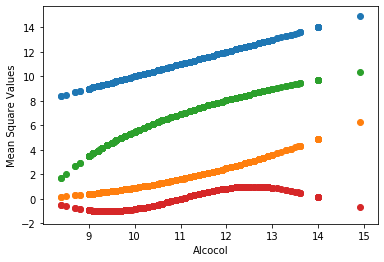

In [17]:
# 扩展alchhol变量，在之前实验4A中它是影响最大的属性
xExtended = []
alcohol = len(xList[1]) # 数据列数

for row in xList:
    newRow = list(row)
    alch = row[alcohol - 1] # 原始属性
    newRow.append((alch-7) * (alch-7) /10) # 添加该属性的2次项
    newRow.append(5 * log(alch-7)) # 添加对数项
    newRow.append(cos(alch)) # 添加余弦
    xExtended.append(newRow)

v1 = [xExtended[j][alcohol-1] for j in range(nrows)]

for i in range(4):
    v2 = [xExtended[j][alcohol -1 + i] for j in range(nrows)]
    plt.scatter(v1,v2) # 新添加的非线性属性和原始属性
plt.xlabel('Alcocol')
plt.ylabel('Mean Square Values')
plt.show()      
 

In [21]:
df.loc[:,'alcohol'].describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64